In [6]:
import pandas as pd
import numpy as np
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

df = pd.merge(ratings, movies, on='movieId', how='left')

In [7]:
df.duplicated().sum()
df.isnull().sum()

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [8]:
print(df.head())

   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [40]:
# Release year
df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)

# Genre count
df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)

# Average Rating given by each User
df['avg_user_rating'] = df.groupby('userId')['rating'].transform('mean')

# Average rating received by each movie 
df['avg_movie_rating'] = df.groupby('movieId')['rating'].transform('mean')

# Extracts the first genre listed 
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else None)

# Flags old movies (before 2000) as classics
df['is_classic'] = df['release_year'].apply(lambda x: 1 if x < 2000 else 0)

In [41]:
print(df.head())

   userId  movieId  rating           timestamp                        title  \
0       1        1     4.0 2000-07-30 18:45:03             Toy Story (1995)   
1       1        3     4.0 2000-07-30 18:20:47      Grumpier Old Men (1995)   
2       1        6     4.0 2000-07-30 18:37:04                  Heat (1995)   
3       1       47     5.0 2000-07-30 19:03:35  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0 2000-07-30 18:48:51   Usual Suspects, The (1995)   

                                        genres  release_year  num_genres  \
0  Adventure|Animation|Children|Comedy|Fantasy        1995.0           5   
1                               Comedy|Romance        1995.0           2   
2                        Action|Crime|Thriller        1995.0           3   
3                             Mystery|Thriller        1995.0           2   
4                       Crime|Mystery|Thriller        1995.0           3   

   rating_hour  avg_user_rating  avg_movie_rating main_genre  is_cla

## Exploratory Data Analysis ##

1. Rating distribution


<Axes: >

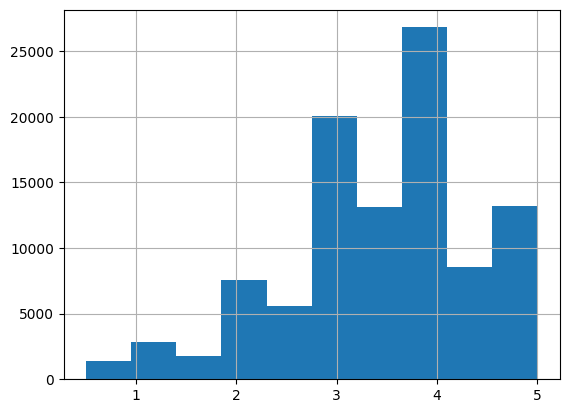

In [30]:
#Rating distribution
print("1. Rating distribution")
df['rating'].hist(bins=10)

In [31]:
#Top 10 Rated Movies
print("2. Top 10 Rated Movies")
df['title'].value_counts().head(10)

2. Top 10 Rated Movies


title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

In [45]:
#Average Rating by Genre
print("3. Average Rating by Genre")
genre_avg = df.groupby('genres')['rating'].mean().sort_values(ascending=False)
print(genre_avg)


3. Average Rating by Genre
genres
Comedy|Crime|Drama|Horror                5.0
Adventure|Comedy|Fantasy|Musical         5.0
Animation|Children|Mystery               5.0
Animation|Drama|Sci-Fi|IMAX              5.0
Adventure|Drama|Fantasy|Horror|Sci-Fi    5.0
                                        ... 
Adventure|Children|Comedy|Sci-Fi         0.5
Drama|Fantasy|Sci-Fi|Thriller            0.5
Horror|Sci-Fi|Western                    0.5
Action|Comedy|Horror|Musical             0.5
Comedy|Fantasy|Horror|Sci-Fi             0.5
Name: rating, Length: 951, dtype: float64


3. correlation between Number of Genre and rating


<Axes: xlabel='num_genres'>

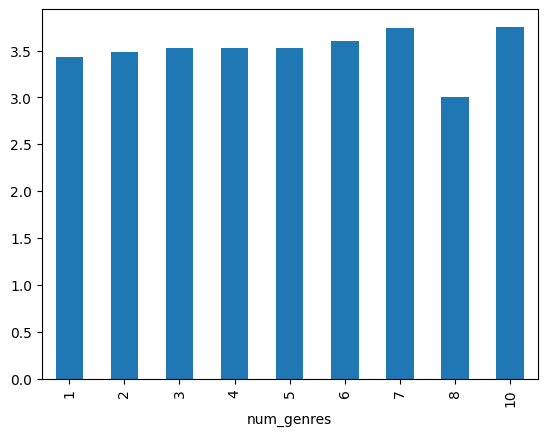

In [33]:
#correlation between Number of Genre and rating
print("4. correlation between Number of Genre and rating")
df.groupby('num_genres')['rating'].mean().plot(kind='bar')

4. Trend of User Ratings over release years


<Axes: xlabel='release_year'>

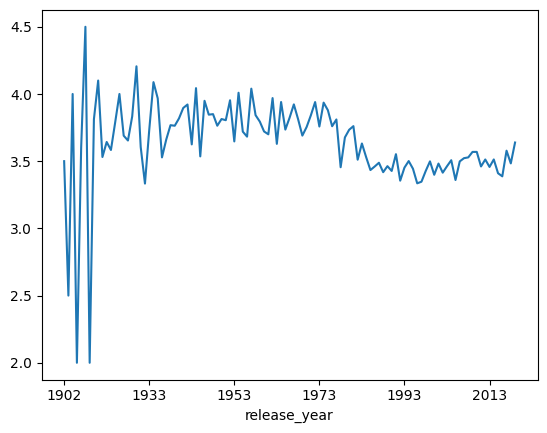

In [34]:
#Trend of User Ratings over release years
print("4. Trend of User Ratings over release years")
df.groupby('release_year')['rating'].mean().plot()

5. User Activity Pattern


<Axes: >

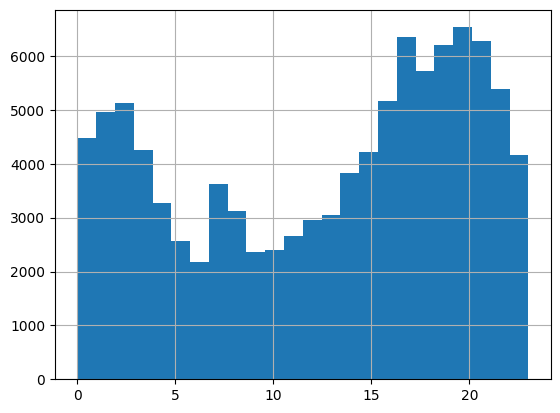

In [35]:
#User Activity Pattern
print("5. User Activity Pattern")
df['rating_hour'] = df['timestamp'].dt.hour
df['rating_hour'].hist(bins=24)